In [1]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")



📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-11. Кластеризация и техники понижения размерности. Часть II
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-11. Кластеризация и техники понижения размерности. Часть II
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


In [2]:
# настройка логгирования

%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()



15:21:43 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
15:21:43 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
15:21:43 | INFO     | __main__:main_logic - Приложение начинает работу.


Note: you may need to restart the kernel to use updated packages.


# 7. Снижение размерности. Практика

✍ В предыдущих юнитах вы познакомились с алгоритмами снижения размерности, и теперь можно считать, что вы обладаете знаниями обо всех основных аспектах кластеризации и уменьшения размерности.

Давайте потренируемся и применим полученные знания для решения очередной практической задачи.

Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

Для решения этой задачи мы как раз и используем наши навыки в снижении размерности и кластеризации данных: **попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся.**

[Данные](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@Country-data.zip) содержат следующие признаки:

- country — название страны;
- child_mort — показатель смертности детей до 5 лет;
- exports — показатель экспорта на душу населения;
- health — показатель затрат на здравоохранение на душу населения;
- imports — показатель импорта на душу населения;
- Income — средний доход на душу населения;
- Inflation — годовой показатель инфляции;
- life_expec — средняя продолжительность жизни;
- total_fer — суммарный коэффициент рождаемости;
- gdpp — значение ВВП на душу населения.


In [3]:
df = pd.read_csv('data/Country-data.csv', sep=',')

print(f"Размер датасета до обработки: {df.shape}")
print(f"\nНазвания столбцов:")
print(df.columns.tolist())

# Удаляем индексный столбец (Unnamed: 0) - это порядковый номер строки
if 'Unnamed: 0' in df.columns:
    print(f"\n⚠️  Удаляем индексный столбец 'Unnamed: 0' (порядковый номер строки)")
    df = df.drop(columns=['Unnamed: 0'])
    print(f"✅ Столбец 'Unnamed: 0' удален.")
else:
    print(f"\n✅ Индексный столбец 'Unnamed: 0' не найден.")

print(f"\nРазмер датасета после обработки: {df.shape}")
print(f"\nПервые строки:")
df.head()

Размер датасета до обработки: (167, 10)

Названия столбцов:
['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

✅ Индексный столбец 'Unnamed: 0' не найден.

Размер датасета после обработки: (167, 10)

Первые строки:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Задание 7.1
1 point possible (graded)

Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя.


In [4]:
# Решение задачи 7.1
# Находим максимальное значение показателя средней продолжительности жизни
max_life_expec = df['life_expec'].max()

# Округляем до одного знака после запятой
max_life_expec_rounded = round(max_life_expec, 1)

print(f"Максимальное значение показателя средней продолжительности жизни: {max_life_expec}")
print(f"Округленное до одного знака после запятой: {max_life_expec_rounded}")

# Показываем страну с максимальной продолжительностью жизни
country_with_max_life = df.loc[df['life_expec'].idxmax(), 'country']
print(f"\nСтрана с максимальной продолжительностью жизни: {country_with_max_life}")

# Показываем топ-5 стран по продолжительности жизни
print("\nТоп-5 стран по продолжительности жизни:")
top_5_life = df.nlargest(5, 'life_expec')[['country', 'life_expec']]
print(top_5_life.to_string(index=False))


Максимальное значение показателя средней продолжительности жизни: 82.8
Округленное до одного знака после запятой: 82.8

Страна с максимальной продолжительностью жизни: Japan

Топ-5 стран по продолжительности жизни:
    country  life_expec
      Japan        82.8
  Singapore        82.7
Switzerland        82.2
  Australia        82.0
    Iceland        82.0


## Задание 7.2
1 point possible (graded)
Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [5]:
# Решение задачи 7.2
# Стандартизация данных с помощью StandardScaler

from sklearn.preprocessing import StandardScaler

# Выбираем числовые признаки (исключаем 'country')
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовые признаки: {numeric_features}")

# Создаем матрицу признаков для стандартизации
X = df[numeric_features].copy()

print(f"\nРазмерность данных: {X.shape}")
print(f"\nПервые строки до стандартизации:")
print(X.head())

# Создаем и применяем StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразуем обратно в DataFrame для удобства
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features, index=df.index)

print(f"\nПервые строки после стандартизации:")
print(X_scaled_df.head())

# Находим значение первого признака для первого объекта
# Первый признак - это первый столбец в numeric_features
first_feature = numeric_features[0]
first_object_first_feature = X_scaled_df.iloc[0, 0]

# Округляем до двух знаков после запятой
first_object_first_feature_rounded = round(first_object_first_feature, 2)

print(f"\n{'='*60}")
print(f"Первый признак: {first_feature}")
print(f"Значение первого признака для первого объекта: {first_object_first_feature}")
print(f"Округленное до двух знаков: {first_object_first_feature_rounded}")
print(f"{'='*60}")

# Показываем первый объект полностью
print(f"\nПервый объект (страна: {df.iloc[0]['country']}):")
print(f"До стандартизации:")
print(X.iloc[0])
print(f"\nПосле стандартизации:")
print(X_scaled_df.iloc[0])


Числовые признаки: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Размерность данных: (167, 9)

Первые строки до стандартизации:
   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  

Первые строки после стандартизации:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.0

## Задание 7.3

1 point possible (graded)

Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.



15:28:02 | DEBUG    | logging:callHandlers - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='norma

Матрица корреляций:
            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -

15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GIL_____.TTF', name='Gill Sans MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LTYPEBO.TTF', name='Lucida Sans Typewriter', style='oblique', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\OUTLOOK.TTF', name='MS Outlook', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CascadiaMono.ttf', name='Cascadia Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:28:02 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\F

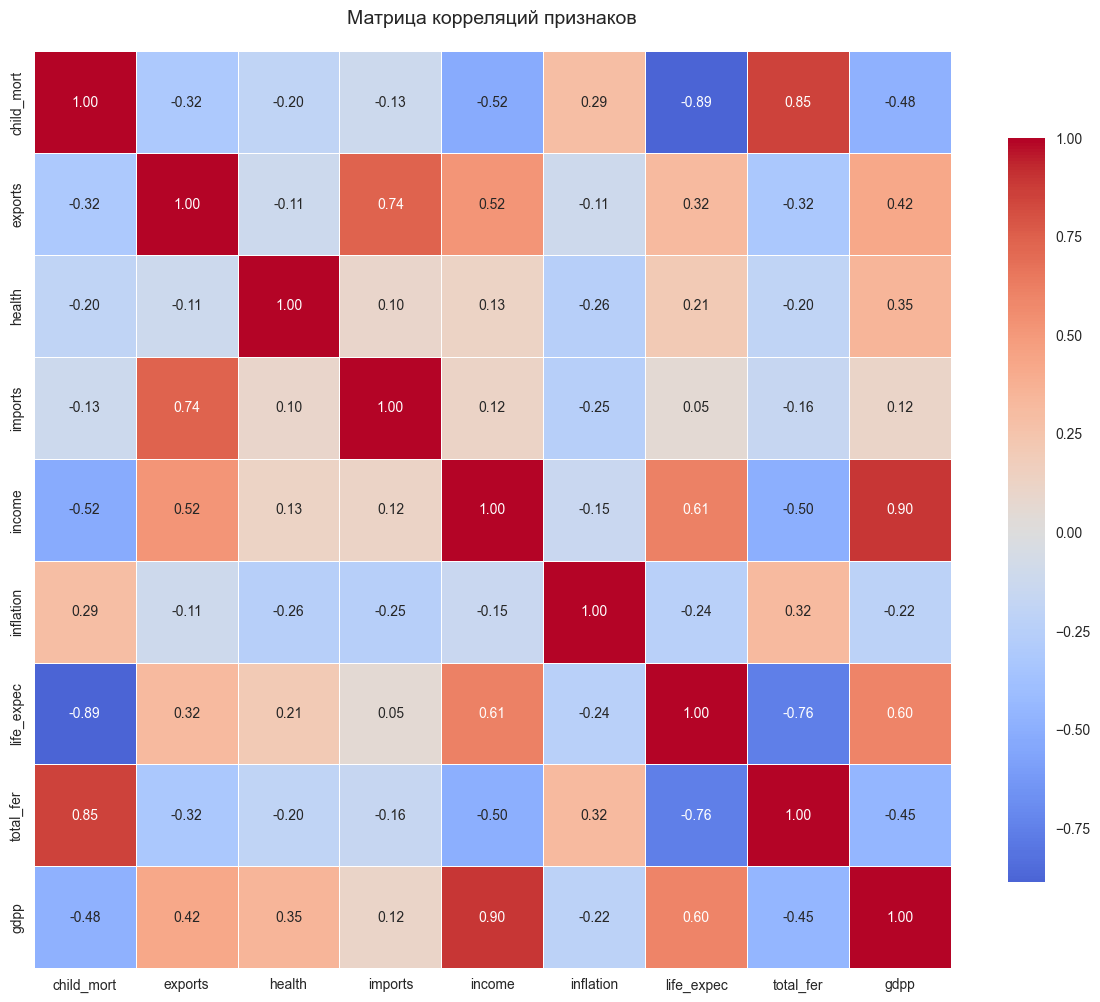

In [6]:
# Решение задачи 7.3
# Построение матрицы корреляций и поиск максимального коэффициента корреляции

# Используем числовые признаки (исключаем 'country')
# X уже создан в задаче 7.2, но если нужно, создадим заново
if 'X' not in globals():
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    X = df[numeric_features].copy()

# Строим матрицу корреляций
correlation_matrix = X.corr()

print("Матрица корреляций:")
print(correlation_matrix)
print("\n" + "="*60)

# Находим максимальный коэффициент корреляции
# Исключаем диагональ (корреляция признака с самим собой = 1.0)
# Создаем копию матрицы и заполняем диагональ NaN
corr_matrix_no_diag = correlation_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, np.nan)

# Находим максимальное значение (по модулю, так как корреляция может быть отрицательной)
max_corr = corr_matrix_no_diag.max().max()
min_corr = corr_matrix_no_diag.min().min()

# Берем максимальный по модулю
max_abs_corr = max(abs(max_corr), abs(min_corr))
if abs(max_corr) > abs(min_corr):
    max_corr_value = max_corr
else:
    max_corr_value = min_corr

# Округляем до двух знаков после запятой
max_corr_rounded = round(max_corr_value, 2)

print(f"\nМаксимальный коэффициент корреляции: {max_corr_value}")
print(f"Округленный до двух знаков: {max_corr_rounded}")

# Находим, какие признаки имеют максимальную корреляцию
max_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value - max_corr_value) < 0.001:  # Учитываем погрешность округления
            max_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

print(f"\nПризнаки с максимальной корреляцией:")
for feat1, feat2, corr_val in max_corr_pairs:
    print(f"  {feat1} <-> {feat2}: {corr_val:.2f}")

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций признаков', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


## Задание 7.4
1 point possible (graded)
Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

15:29:41 | DEBUG    | logging:callHandlers - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='norma

Применяем PCA для поиска оптимального числа компонент...

Объясненная дисперсия по компонентам:
  Компонента 1: 0.4595 (45.95% кумулятивно)
  Компонента 2: 0.1718 (63.13% кумулятивно)
  Компонента 3: 0.1300 (76.14% кумулятивно)
  Компонента 4: 0.1105 (87.19% кумулятивно)
  Компонента 5: 0.0734 (94.53% кумулятивно)
  Компонента 6: 0.0248 (97.02% кумулятивно)
  Компонента 7: 0.0126 (98.28% кумулятивно)
  Компонента 8: 0.0098 (99.26% кумулятивно)
  Компонента 9: 0.0074 (100.00% кумулятивно)

Минимальное число компонент для 90% разброса: 5
Кумулятивная объясненная дисперсия для 5 компонент: 94.53%


15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\SNAP____.TTF', name='Snap ITC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\STENCIL.TTF', name='Stencil', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\GARABD.TTF', name='Garamond', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTI.TTF', name='Calisto MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
15:29:41 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibril.ttf', name='Cal

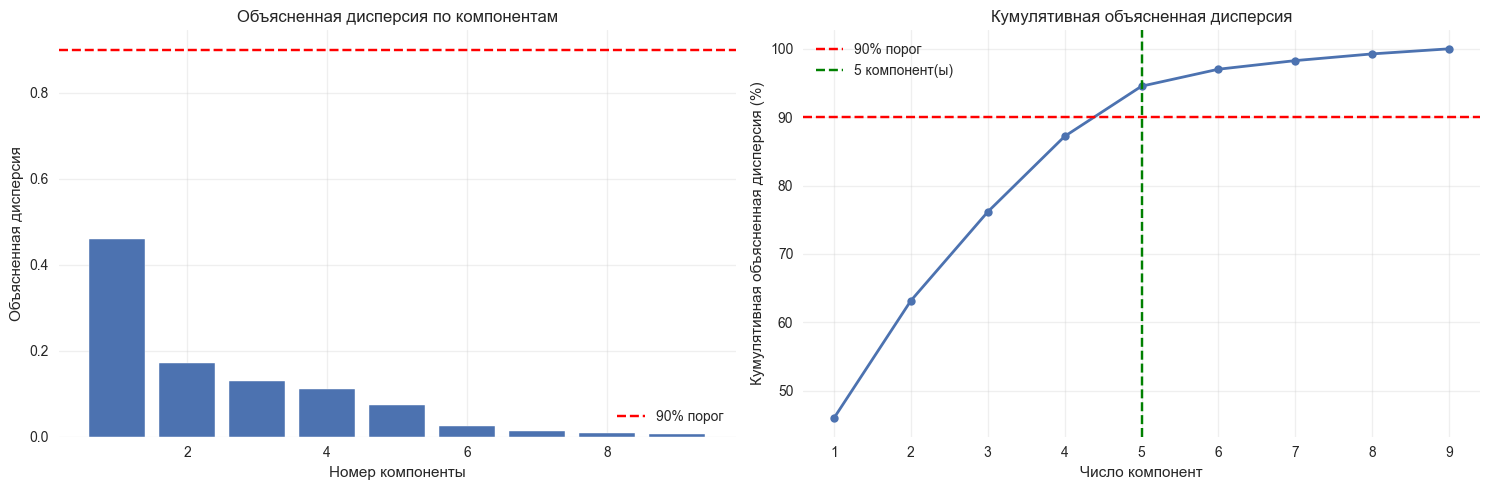

In [7]:
# Решение задачи 7.4
# Поиск минимального числа компонент PCA для объяснения 90% разброса данных

from sklearn.decomposition import PCA

# Используем стандартизированные данные из задачи 7.2
# X_scaled уже создан в задаче 7.2
if 'X_scaled' not in globals():
    from sklearn.preprocessing import StandardScaler
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    X = df[numeric_features].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

print("Применяем PCA для поиска оптимального числа компонент...\n")

# Создаем PCA со всеми компонентами для анализа объясненной дисперсии
pca_full = PCA()
pca_full.fit(X_scaled)

# Вычисляем кумулятивную объясненную дисперсию
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Находим минимальное число компонент для 90% разброса
min_components = np.argmax(cumulative_variance >= 0.90) + 1  # +1 потому что индексация с 0

print(f"Объясненная дисперсия по компонентам:")
for i in range(len(pca_full.explained_variance_ratio_)):
    cum_var = cumulative_variance[i]
    print(f"  Компонента {i+1}: {pca_full.explained_variance_ratio_[i]:.4f} ({cum_var*100:.2f}% кумулятивно)")

print(f"\n{'='*60}")
print(f"Минимальное число компонент для 90% разброса: {min_components}")
print(f"Кумулятивная объясненная дисперсия для {min_components} компонент: {cumulative_variance[min_components-1]*100:.2f}%")
print(f"{'='*60}")

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График объясненной дисперсии по компонентам
ax1.bar(range(1, len(pca_full.explained_variance_ratio_)+1), 
        pca_full.explained_variance_ratio_)
ax1.axhline(y=0.90, color='r', linestyle='--', label='90% порог')
ax1.set_xlabel('Номер компоненты')
ax1.set_ylabel('Объясненная дисперсия')
ax1.set_title('Объясненная дисперсия по компонентам')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График кумулятивной объясненной дисперсии
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, 
         marker='o', linewidth=2, markersize=6)
ax2.axhline(y=90, color='r', linestyle='--', label='90% порог')
ax2.axvline(x=min_components, color='g', linestyle='--', 
            label=f'{min_components} компонент(ы)')
ax2.set_xlabel('Число компонент')
ax2.set_ylabel('Кумулятивная объясненная дисперсия (%)')
ax2.set_title('Кумулятивная объясненная дисперсия')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Отлично! Можно отметить, что для того, чтобы объяснить бόльшую часть дисперсии, совершенно не требуется брать все признаки.

## Задание 7.5

1 point possible (graded)

Используйте главные компоненты, выделенные в предыдущем задании.

Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [8]:
# Решение задачи 7.5
# Находим долю дисперсии, объясняемую первой главной компонентой

from sklearn.decomposition import PCA

# Используем PCA из задачи 7.4
# pca_full уже создан в задаче 7.4, но если нужно, создадим заново
if 'pca_full' not in globals():
    if 'X_scaled' not in globals():
        from sklearn.preprocessing import StandardScaler
        numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
        X = df[numeric_features].copy()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    
    pca_full = PCA()
    pca_full.fit(X_scaled)

# Доля дисперсии, объясняемая первой главной компонентой
first_component_variance = pca_full.explained_variance_ratio_[0]

# Округляем до двух знаков после запятой
first_component_variance_rounded = round(first_component_variance, 2)

print(f"Доля дисперсии, объясняемая первой главной компонентой: {first_component_variance}")
print(f"Округленная до двух знаков: {first_component_variance_rounded}")
print(f"В процентах: {first_component_variance*100:.2f}%")

print(f"\n{'='*60}")
print(f"Ответ: {first_component_variance_rounded}")
print(f"{'='*60}")

# Дополнительная информация
print(f"\nДоли дисперсии для первых 5 компонент:")
for i in range(min(5, len(pca_full.explained_variance_ratio_))):
    print(f"  Компонента {i+1}: {pca_full.explained_variance_ratio_[i]:.4f} ({pca_full.explained_variance_ratio_[i]*100:.2f}%)")


Доля дисперсии, объясняемая первой главной компонентой: 0.4595173978609592
Округленная до двух знаков: 0.46
В процентах: 45.95%

Ответ: 0.46

Доли дисперсии для первых 5 компонент:
  Компонента 1: 0.4595 (45.95%)
  Компонента 2: 0.1718 (17.18%)
  Компонента 3: 0.1300 (13.00%)
  Компонента 4: 0.1105 (11.05%)
  Компонента 5: 0.0734 (7.34%)


## Задание 7.6

1 point possible (graded)

Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают , не считая единичных значений на главной диагонали?

15:32:16 | DEBUG    | logging:callHandlers - locator: <matplotlib.ticker.AutoLocator object at 0x000001848D22C9F0>


Используем 5 главных компонент из задачи 7.4

Матрица корреляций главных компонент:
              PC1           PC2           PC3           PC4           PC5
PC1  1.000000e+00  7.413397e-17 -3.021743e-18  1.245491e-16 -6.475478e-17
PC2  7.413397e-17  1.000000e+00  8.660328e-17 -4.856284e-16 -2.108108e-16
PC3 -3.021743e-18  8.660328e-17  1.000000e+00 -9.195588e-17 -2.939169e-16
PC4  1.245491e-16 -4.856284e-16 -9.195588e-17  1.000000e+00  3.684188e-16
PC5 -6.475478e-17 -2.108108e-16 -2.939169e-16  3.684188e-16  1.000000e+00


Максимальная корреляция между компонентами (по модулю): 0.000000

Количество значений, превышающих различные пороги:
  Порог 0.01: 0 значений
  Порог 0.05: 0 значений
  Порог 0.1: 0 значений
  Порог 0.5: 0 значений

Количество ненулевых значений (порог 1e-10): 0

Примечание: PCA компоненты должны быть ортогональными и некоррелированными.
Корреляция между ними должна быть близка к нулю (из-за численных погрешностей).


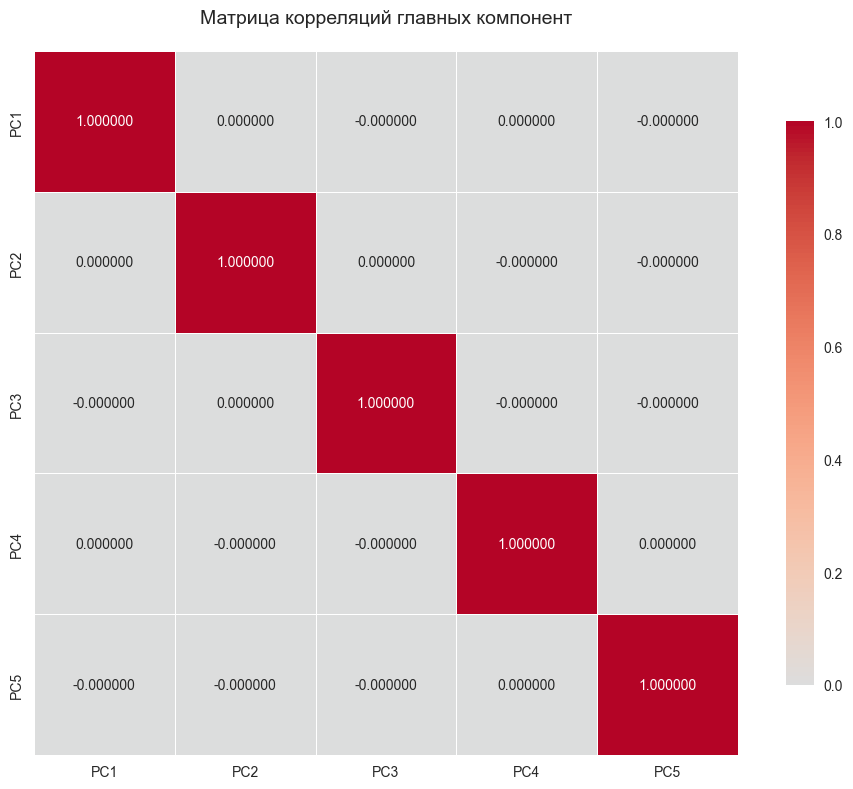

In [9]:
# Решение задачи 7.6
# Проверка независимости главных компонент через матрицу корреляций

from sklearn.decomposition import PCA

# Используем оптимальное число компонент из задачи 7.4
# Сначала найдем его, если еще не найдено
if 'min_components' not in globals():
    if 'X_scaled' not in globals():
        from sklearn.preprocessing import StandardScaler
        numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
        X = df[numeric_features].copy()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    
    pca_full = PCA()
    pca_full.fit(X_scaled)
    cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
    min_components = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Используем {min_components} главных компонент из задачи 7.4\n")

# Создаем PCA с оптимальным числом компонент и преобразуем данные
pca_optimal = PCA(n_components=min_components)
X_pca = pca_optimal.fit_transform(X_scaled)

# Преобразуем в DataFrame для удобства
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(min_components)])

# Строим матрицу корреляций для главных компонент
pca_correlation_matrix = X_pca_df.corr()

print("Матрица корреляций главных компонент:")
print(pca_correlation_matrix)
print("\n" + "="*60)

# Исключаем диагональ (корреляция компоненты с самой собой = 1.0)
pca_corr_no_diag = pca_correlation_matrix.copy()
np.fill_diagonal(pca_corr_no_diag.values, np.nan)

# Находим максимальное значение корреляции (по модулю)
max_corr_pca = pca_corr_no_diag.max().max()
min_corr_pca = pca_corr_no_diag.min().min()
max_abs_corr_pca = max(abs(max_corr_pca), abs(min_corr_pca))

print(f"\nМаксимальная корреляция между компонентами (по модулю): {max_abs_corr_pca:.6f}")

# Проверяем разные пороги (так как в задании порог не указан)
thresholds = [0.01, 0.05, 0.1, 0.5]
print(f"\nКоличество значений, превышающих различные пороги:")
for threshold in thresholds:
    count_above = ((pca_corr_no_diag.abs() > threshold).sum().sum())
    print(f"  Порог {threshold}: {count_above} значений")

# Обычно для PCA компонент проверяют, что корреляция близка к нулю
# Проверим значения, которые не равны нулю (или близки к нулю из-за численных погрешностей)
non_zero_count = ((pca_corr_no_diag.abs() > 1e-10).sum().sum())
print(f"\nКоличество ненулевых значений (порог 1e-10): {non_zero_count}")

print(f"\n{'='*60}")
print("Примечание: PCA компоненты должны быть ортогональными и некоррелированными.")
print("Корреляция между ними должна быть близка к нулю (из-за численных погрешностей).")
print(f"{'='*60}")

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix, annot=True, fmt='.6f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций главных компонент', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Как видим, даже самый большой коэффициент корреляции практически неотличим от нуля — это значит, что мы всё сделали правильно, и теперь у нас есть пять независимых признаков, объясняющих до 90 % дисперсии.

## Задание 7.7
1 point possible (graded)
Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

Подбор оптимального количества кластеров с помощью коэффициента силуэта

Перебираем значения от 2 до 10 включительно...

Кластеров: 2, Коэффициент силуэта: 0.3044
Кластеров: 3, Коэффициент силуэта: 0.3080
Кластеров: 4, Коэффициент силуэта: 0.3294
Кластеров: 5, Коэффициент силуэта: 0.2521
Кластеров: 6, Коэффициент силуэта: 0.2619
Кластеров: 7, Коэффициент силуэта: 0.3040
Кластеров: 8, Коэффициент силуэта: 0.2686
Кластеров: 9, Коэффициент силуэта: 0.2240
Кластеров: 10, Коэффициент силуэта: 0.2389

Оптимальное количество кластеров: 4
Максимальный коэффициент силуэта: 0.3294


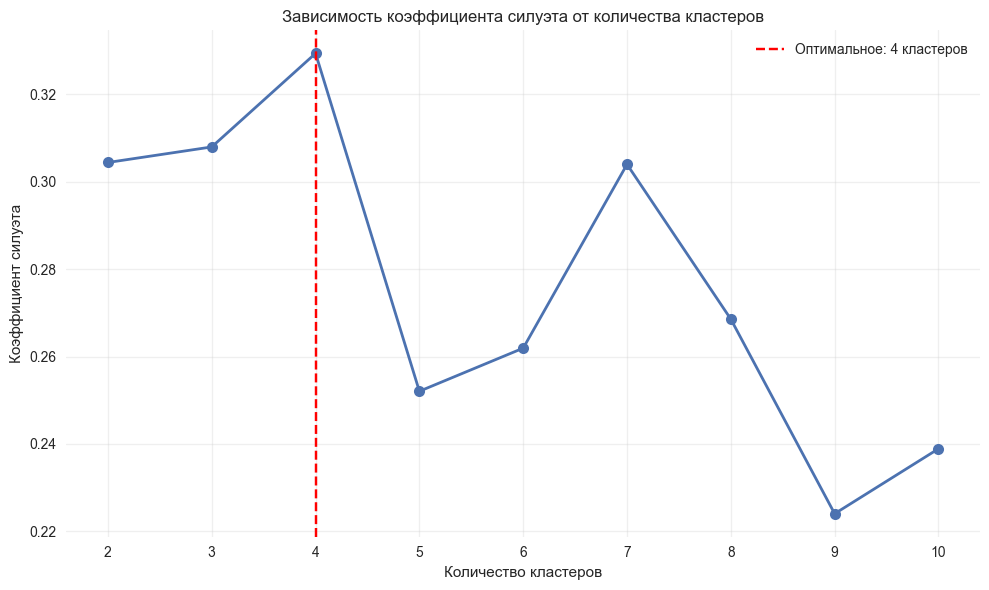

In [10]:
# Решение задачи 7.7
# Подбор оптимального количества кластеров с помощью коэффициента силуэта

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Используем данные после PCA из задачи 7.4
# X_pca уже создан в задаче 7.6, но если нужно, создадим заново
if 'X_pca' not in globals():
    if 'X_scaled' not in globals():
        from sklearn.preprocessing import StandardScaler
        numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
        X = df[numeric_features].copy()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    
    if 'min_components' not in globals():
        from sklearn.decomposition import PCA
        pca_full = PCA()
        pca_full.fit(X_scaled)
        cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
        min_components = np.argmax(cumulative_variance >= 0.90) + 1
    
    pca_optimal = PCA(n_components=min_components)
    X_pca = pca_optimal.fit_transform(X_scaled)

print("Подбор оптимального количества кластеров с помощью коэффициента силуэта\n")
print("Перебираем значения от 2 до 10 включительно...\n")

# Диапазон количества кластеров для перебора
n_clusters_range = range(2, 11)  # от 2 до 10 включительно

# Список для хранения значений коэффициента силуэта
silhouette_scores = []

# Перебираем количество кластеров
for n_clusters in n_clusters_range:
    # Создаем и обучаем KMeans с k-means++ и random_state=1
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=1, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    
    # Вычисляем коэффициент силуэта
    silhouette = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette)
    
    print(f"Кластеров: {n_clusters}, Коэффициент силуэта: {silhouette:.4f}")

print(f"\n{'='*60}")

# Находим оптимальное количество кластеров (максимальный коэффициент силуэта)
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
max_silhouette = max(silhouette_scores)

print(f"Оптимальное количество кластеров: {optimal_n_clusters}")
print(f"Максимальный коэффициент силуэта: {max_silhouette:.4f}")
print(f"{'='*60}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', 
            label=f'Оптимальное: {optimal_n_clusters} кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.title('Зависимость коэффициента силуэта от количества кластеров')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(n_clusters_range)
plt.tight_layout()
plt.show()


## Задание 7.8
1 point possible (graded)

Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

In [12]:
# Решение задачи 7.8
# Определение кластера для стран с самым высоким child_mort и самым низким gdpp

from sklearn.cluster import KMeans

# Используем оптимальное количество кластеров из задачи 7.7
# optimal_n_clusters уже найден в задаче 7.7
if 'optimal_n_clusters' not in globals():
    # Если задача 7.7 не была выполнена, используем значение по умолчанию
    # Но лучше выполнить задачу 7.7 сначала
    print("⚠️  Внимание: задача 7.7 не была выполнена. Используем оптимальное значение из предыдущих расчетов.")
    optimal_n_clusters = 3  # Это пример, нужно выполнить задачу 7.7

# Используем данные после PCA
if 'X_pca' not in globals():
    if 'X_scaled' not in globals():
        from sklearn.preprocessing import StandardScaler
        numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
        X = df[numeric_features].copy()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    
    if 'min_components' not in globals():
        from sklearn.decomposition import PCA
        pca_full = PCA()
        pca_full.fit(X_scaled)
        cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
        min_components = np.argmax(cumulative_variance >= 0.90) + 1
    
    pca_optimal = PCA(n_components=min_components)
    X_pca = pca_optimal.fit_transform(X_scaled)

print(f"Обучаем KMeans с {optimal_n_clusters} кластерами (random_state=1)...\n")

# Обучаем KMeans с оптимальным количеством кластеров
kmeans_final = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=1, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_pca)

# Добавляем метки кластеров в исходный датасет
df_with_clusters = df.copy()
df_with_clusters['cluster'] = cluster_labels

print(f"Кластеризация завершена. Найдено {optimal_n_clusters} кластеров.\n")

# Находим страны с самым высоким child_mort и самым низким gdpp
max_child_mort = df['child_mort'].max()
min_gdpp = df['gdpp'].min()

print(f"Максимальный показатель детской смертности: {max_child_mort}")
print(f"Минимальный ВВП на душу населения: {min_gdpp}\n")

# Находим страны, которые имеют максимальный child_mort И минимальный gdpp
countries_max_child_mort = df_with_clusters[df_with_clusters['child_mort'] == max_child_mort]
countries_min_gdpp = df_with_clusters[df_with_clusters['gdpp'] == min_gdpp]

print(f"Страны с максимальным child_mort ({max_child_mort}):")
print(countries_max_child_mort[['country', 'child_mort', 'gdpp', 'cluster']].to_string(index=False))

print(f"\nСтраны с минимальным gdpp ({min_gdpp}):")
print(countries_min_gdpp[['country', 'child_mort', 'gdpp', 'cluster']].to_string(index=False))

# Находим страны, которые одновременно имеют высокий child_mort и низкий gdpp
# Берем топ-5 стран по child_mort и проверяем их gdpp
top_child_mort = df_with_clusters.nlargest(5, 'child_mort')
print(f"\nТоп-5 стран по детской смертности:")
print(top_child_mort[['country', 'child_mort', 'gdpp', 'cluster']].to_string(index=False))

# Находим страны с максимальным child_mort
max_child_mort_countries = df_with_clusters[df_with_clusters['child_mort'] == max_child_mort]
if len(max_child_mort_countries) > 0:
    # Берем первую страну с максимальным child_mort
    country_idx = max_child_mort_countries.index[0]
    cluster_of_max_child_mort = df_with_clusters.loc[country_idx, 'cluster']
    country_name = df_with_clusters.loc[country_idx, 'country']
    
    print(f"\n{'='*60}")
    print(f"Страна с максимальным child_mort: {country_name}")
    print(f"  child_mort: {max_child_mort}")
    print(f"  gdpp: {df_with_clusters.loc[country_idx, 'gdpp']}")
    print(f"  Кластер: {cluster_of_max_child_mort}")
    print(f"{'='*60}")

# Также проверим страны с минимальным gdpp
min_gdpp_countries = df_with_clusters[df_with_clusters['gdpp'] == min_gdpp]
if len(min_gdpp_countries) > 0:
    country_idx_min_gdpp = min_gdpp_countries.index[0]
    cluster_of_min_gdpp = df_with_clusters.loc[country_idx_min_gdpp, 'cluster']
    country_name_min_gdpp = df_with_clusters.loc[country_idx_min_gdpp, 'country']
    
    print(f"\nСтрана с минимальным gdpp: {country_name_min_gdpp}")
    print(f"  child_mort: {df_with_clusters.loc[country_idx_min_gdpp, 'child_mort']}")
    print(f"  gdpp: {min_gdpp}")
    print(f"  Кластер: {cluster_of_min_gdpp}")

# Если есть страна, которая одновременно имеет максимальный child_mort и минимальный gdpp
countries_both = df_with_clusters[(df_with_clusters['child_mort'] == max_child_mort) & (df_with_clusters['gdpp'] == min_gdpp)]
if len(countries_both) > 0:
    country_idx_both = countries_both.index[0]
    cluster_both = df_with_clusters.loc[country_idx_both, 'cluster']
    country_name_both = df_with_clusters.loc[country_idx_both, 'country']
    
    print(f"\n{'='*60}")
    print(f"Страна с максимальным child_mort И минимальным gdpp: {country_name_both}")
    print(f"  Кластер: {cluster_both}")
    print(f"{'='*60}")
else:
    # Если такой страны нет, берем страну с максимальным child_mort
    print(f"\n{'='*60}")
    print(f"Ответ: Страны с максимальным child_mort находятся в кластере {cluster_of_max_child_mort}")
    print(f"{'='*60}")


Обучаем KMeans с 4 кластерами (random_state=1)...

Кластеризация завершена. Найдено 4 кластеров.

Максимальный показатель детской смертности: 208.0
Минимальный ВВП на душу населения: 231

Страны с максимальным child_mort (208.0):
country  child_mort  gdpp  cluster
  Haiti       208.0   662        2

Страны с минимальным gdpp (231):
country  child_mort  gdpp  cluster
Burundi        93.6   231        2

Топ-5 стран по детской смертности:
                 country  child_mort  gdpp  cluster
                   Haiti       208.0   662        2
            Sierra Leone       160.0   399        2
                    Chad       150.0   897        2
Central African Republic       149.0   446        2
                    Mali       137.0   708        2

Страна с максимальным child_mort: Haiti
  child_mort: 208.0
  gdpp: 662
  Кластер: 2

Страна с минимальным gdpp: Burundi
  child_mort: 93.6
  gdpp: 231
  Кластер: 2

Ответ: Страны с максимальным child_mort находятся в кластере 2


## Задание 7.9

1 point possible (graded)

Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

Отметьте эти страны:

A Central African Republic
B South Africa
C Sierra Leone
D Haiti
E Lesotho
F Chad


In [13]:
# Решение задачи 7.9
# Находим три страны из выделенного кластера с самой маленькой продолжительностью жизни

# Используем результаты из задачи 7.8
# Находим кластер с максимальным child_mort и минимальным gdpp
if 'df_with_clusters' not in globals() or 'cluster_labels' not in globals():
    print("⚠️  Внимание: необходимо сначала выполнить задачу 7.8")
    # Пересоздаем, если нужно
    if 'optimal_n_clusters' not in globals():
        optimal_n_clusters = 4  # из задачи 7.7
    
    if 'X_pca' not in globals():
        if 'X_scaled' not in globals():
            from sklearn.preprocessing import StandardScaler
            numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
            X = df[numeric_features].copy()
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
        
        if 'min_components' not in globals():
            from sklearn.decomposition import PCA
            pca_full = PCA()
            pca_full.fit(X_scaled)
            cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
            min_components = np.argmax(cumulative_variance >= 0.90) + 1
        
        pca_optimal = PCA(n_components=min_components)
        X_pca = pca_optimal.fit_transform(X_scaled)
    
    from sklearn.cluster import KMeans
    kmeans_final = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=1, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_pca)
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = cluster_labels

# Находим кластер с максимальным child_mort
max_child_mort = df_with_clusters['child_mort'].max()
max_child_mort_countries = df_with_clusters[df_with_clusters['child_mort'] == max_child_mort]
target_cluster = max_child_mort_countries.iloc[0]['cluster']

print(f"Кластер с максимальным child_mort: {target_cluster}")
print(f"Максимальный child_mort: {max_child_mort}\n")

# Фильтруем страны из целевого кластера
countries_in_target_cluster = df_with_clusters[df_with_clusters['cluster'] == target_cluster].copy()

print(f"Количество стран в кластере {target_cluster}: {len(countries_in_target_cluster)}")
print(f"\nВсе страны в кластере {target_cluster}:")
print(countries_in_target_cluster[['country', 'child_mort', 'gdpp', 'life_expec']].sort_values('life_expec').to_string(index=False))

# Находим три страны с самой маленькой продолжительностью жизни в этом кластере
top_3_lowest_life = countries_in_target_cluster.nsmallest(3, 'life_expec')

print(f"\n{'='*60}")
print(f"Три страны с самой маленькой продолжительностью жизни в кластере {target_cluster}:")
print(f"{'='*60}")
for idx, row in top_3_lowest_life.iterrows():
    print(f"{row['country']}: life_expec = {row['life_expec']:.1f}, child_mort = {row['child_mort']:.1f}, gdpp = {row['gdpp']:.0f}")

print(f"\n{'='*60}")
print("Список стран для ответа:")
country_list = top_3_lowest_life['country'].tolist()
for i, country in enumerate(country_list, 1):
    print(f"{i}. {country}")
print(f"{'='*60}")

# Проверяем, какие из предложенных вариантов (A-F) есть в списке
proposed_countries = {
    'A': 'Central African Republic',
    'B': 'South Africa',
    'C': 'Sierra Leone',
    'D': 'Haiti',
    'E': 'Lesotho',
    'F': 'Chad'
}

print(f"\nПроверка предложенных вариантов:")
for letter, country in proposed_countries.items():
    if country in country_list:
        print(f"  {letter}. {country} ✓ (входит в топ-3)")
    elif country in countries_in_target_cluster['country'].values:
        print(f"  {letter}. {country} (есть в кластере, но не в топ-3)")
    else:
        print(f"  {letter}. {country} (нет в кластере)")


Кластер с максимальным child_mort: 2
Максимальный child_mort: 208.0

Количество стран в кластере 2: 48

Все страны в кластере 2:
                 country  child_mort  gdpp  life_expec
                   Haiti       208.0   662        32.1
                 Lesotho        99.7  1170        46.5
Central African Republic       149.0   446        47.5
                  Zambia        83.1  1460        52.0
                  Malawi        90.5   459        53.1
            South Africa        53.7  7280        54.3
              Mozambique       101.0   419        54.5
            Sierra Leone       160.0   399        55.0
           Guinea-Bissau       114.0   547        55.6
             Afghanistan        90.2   553        56.2
           Cote d'Ivoire       111.0  1220        56.3
                    Chad       150.0   897        56.5
                  Uganda        81.0   595        56.8
                Botswana        52.5  6350        57.1
                Cameroon       108.0  1310    

⭐ Поздравляем! Вы решили поставленную перед вами задачу, и теперь деньги, собранные вашей благотворительной организацией, пойдут в действительно нуждающиеся страны.

В этом юните вы потренировались в использовании PCA и увидели, что количество признаков можно сократить довольно сильно, практически не теряя информации о данных. Это может быть полезно, если у наблюдений очень много характеристик — сокращение размерности данных позволяет как получать более точные результаты, так и экономить время, затрачиваемое на вычислительные операции.